In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = '../Data/MN2015_2020_2DoAn_CNTT.xlsx'
df = pd.read_excel(data)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ngày      2192 non-null   object
 1   Giờ đo    8768 non-null   object
 2   X. QUAN   8768 non-null   object
 3   CẦU CẤT   8768 non-null   object
 4   CẦU XE    8768 non-null   object
 5   AN THỔ    8768 non-null   object
 6   LỰC ĐIỀN  8768 non-null   object
 7   BÁ THUỶ   8768 non-null   object
dtypes: object(8)
memory usage: 548.1+ KB
None
                  Ngày Giờ đo X. QUAN CẦU CẤT CẦU XE AN THỔ LỰC ĐIỀN BÁ THUỶ
0  2015-01-01 00:00:00     1h      38      60     55     60       63      51
1                  NaN     7h      78      95     85     78       46      48
2                  NaN    13h      90      40     18     17       43      45
3                  NaN    19h      50       0    -17    -19       40      26
4  2015-01-02 00:00:00     1h      40     100     65     48       34      23


In [3]:
df.isnull().sum()


Ngày        6576
Giờ đo         0
X. QUAN        0
CẦU CẤT        0
CẦU XE         0
AN THỔ         0
LỰC ĐIỀN       0
BÁ THUỶ        0
dtype: int64

In [4]:

# Bước 1: Điền giá trị ngày bị thiếu
df['Ngày'] = df['Ngày'].ffill()

# Bước 2: Chuẩn hóa cột 'Giờ đo', ví dụ '1h' -> '01:00:00'
def convert_hour(h):
    h = str(h).strip().replace('h', '')
    try:
        h = int(h)
        return f'{h:02d}:00:00'
    except:
        return None  # hoặc '00:00:00'

df['Giờ chuẩn'] = df['Giờ đo'].apply(convert_hour)

# Bước 3: Tạo cột datetime từ 'Ngày' và 'Giờ chuẩn'
df['Datetime'] = pd.to_datetime(df['Ngày'].astype(str).str[:10] + ' ' + df['Giờ chuẩn'], errors='coerce')

# Kiểm tra kết quả
print(df[['Ngày', 'Giờ đo', 'Giờ chuẩn', 'Datetime']].head(10))


                  Ngày Giờ đo Giờ chuẩn            Datetime
0  2015-01-01 00:00:00     1h  01:00:00 2015-01-01 01:00:00
1  2015-01-01 00:00:00     7h  07:00:00 2015-01-01 07:00:00
2  2015-01-01 00:00:00    13h  13:00:00 2015-01-01 13:00:00
3  2015-01-01 00:00:00    19h  19:00:00 2015-01-01 19:00:00
4  2015-01-02 00:00:00     1h  01:00:00 2015-01-02 01:00:00
5  2015-01-02 00:00:00     7h  07:00:00 2015-01-02 07:00:00
6  2015-01-02 00:00:00    13h  13:00:00 2015-01-02 13:00:00
7  2015-01-02 00:00:00    19h  19:00:00 2015-01-02 19:00:00
8  2015-01-03 00:00:00     1h  01:00:00 2015-01-03 01:00:00
9  2015-01-03 00:00:00     7h  07:00:00 2015-01-03 07:00:00


In [15]:
numeric_cols = df.select_dtypes(include = 'number').columns

In [5]:
# Chuyển các cột dữ liệu về dạng số (nếu có lỗi thì thành NaN)
cols_to_numeric = ['X. QUAN', 'CẦU CẤT', 'CẦU XE', 'AN THỔ', 'LỰC ĐIỀN', 'BÁ THUỶ']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Điền giá trị thiếu trong các cột số bằng trung bình từng cột
df[cols_to_numeric] = df[cols_to_numeric].fillna(df[cols_to_numeric].mean())


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
X. QUAN,8768.0,191.48151,0.185,120.0,171.0,225.0,827.0,112.534939
CẦU CẤT,8768.0,98.899903,-29.0,60.0,98.899903,131.0,328.0,52.923721
CẦU XE,8768.0,72.594967,-48.0,32.0,72.594967,111.0,255.0,53.897484
AN THỔ,8768.0,72.374788,-50.0,33.0,72.374788,110.0,272.0,53.133923
LỰC ĐIỀN,8768.0,136.623443,7.0,118.0,136.0,152.0,319.0,35.386592
BÁ THUỶ,8768.0,127.702153,-7.0,116.0,127.702153,140.0,261.0,28.23343
Datetime,8760,2017-12-30 17:36:19.726027264,2014-01-24 01:00:00,2016-06-29 11:30:00,2018-01-01 22:00:00,2019-07-03 08:30:00,2020-12-31 19:00:00,NaN


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
# chỉ giữ các cột số cần phân tích
cols_to_check = ['X. QUAN', 'CẦU CẤT', 'CẦU XE', 'AN THỔ', 'LỰC ĐIỀN', 'BÁ THUỶ']
data = df[cols_to_check]
outliers_all = pd.DataFrame() #bảng lưu tất cả các giá trị ngoiaj lai

In [9]:
# Hàm phát hiện ngoại lai theo IQR
def get_outliers_iqr(series):
    Q1= series.quantile(0.25)
    Q3= series.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series>upper_bound)]

In [10]:
for col in cols_to_check:
    outliers = get_outliers_iqr(data[col])
    print(f"---{col}---")
    if not outliers.empty:
        outlier_df = df.loc[outliers.index, ['Ngày', 'Giờ đo', col]].copy()
        outlier_df['Biến'] = col
        outlier_df.rename(columns={col: 'Giá trị ngoại lai'}, inplace=True)
        outliers_all = pd.concat([outliers_all, outlier_df], ignore_index=True)

        print(f"Số lượng giá trị ngoại lai: {outliers.count()}")
        print(f"Giá trị ngoại lai: \n{outliers.describe()}\n")
    else:
        print("Không có giá trị ngoại lai.\n")


---X. QUAN---
Số lượng giá trị ngoại lai: 554
Giá trị ngoại lai: 
count    554.000000
mean     515.703971
std       98.604948
min      383.000000
25%      434.000000
50%      497.500000
75%      580.750000
max      827.000000
Name: X. QUAN, dtype: float64

---CẦU CẤT---
Số lượng giá trị ngoại lai: 111
Giá trị ngoại lai: 
count    111.000000
mean     261.207207
std       19.652026
min      239.000000
25%      245.000000
50%      258.000000
75%      274.000000
max      328.000000
Name: CẦU CẤT, dtype: float64

---CẦU XE---
Số lượng giá trị ngoại lai: 11
Giá trị ngoại lai: 
count     11.000000
mean     239.090909
std        8.080279
min      230.000000
25%      234.500000
50%      235.000000
75%      241.500000
max      255.000000
Name: CẦU XE, dtype: float64

---AN THỔ---
Số lượng giá trị ngoại lai: 14
Giá trị ngoại lai: 
count     14.000000
mean     242.214286
std       13.879584
min      226.000000
25%      232.750000
50%      239.500000
75%      246.250000
max      272.000000
Name: AN

C:\Users\giang\AppData\Local\Temp\ipykernel_9648\2313158157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Biến', y='Giá trị', data=data_long, palette='Set2')


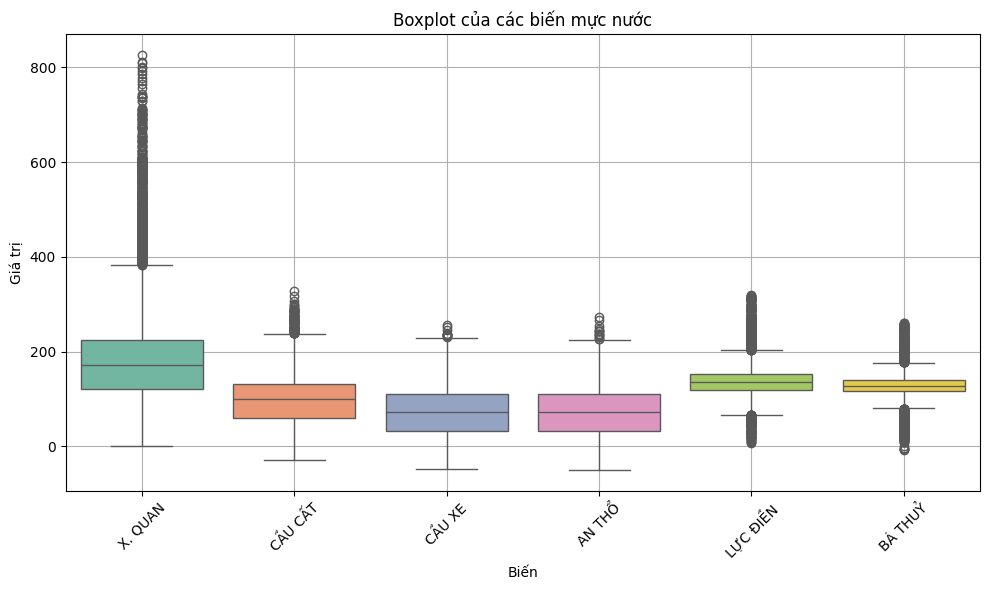

In [21]:
# Giả sử bạn có các cột mực nước từ các trạm sau
cols_to_check =  ['X. QUAN', 'CẦU CẤT', 'CẦU XE', 'AN THỔ', 'LỰC ĐIỀN','BÁ THUỶ']
# Chuyển sang dạng long
data_long = data[cols_to_check].melt(var_name='Biến', value_name='Giá trị')

# Vẽ boxplot gộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='Biến', y='Giá trị', data=data_long, palette='Set2')

plt.title('Boxplot của các biến mực nước')
plt.grid(True)
plt.xlabel('Biến')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
columns_to_clean = ['X. QUAN', 'CẦU CẤT', 'CẦU XE', 'AN THỔ', 'LỰC ĐIỀN', 'BÁ THUỶ']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median() #thay thế giá trị ngoại lai bằng trung vị
    
    # Thay thế giá trị ngoại lai bằng median
    df[col] = df[col].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)


In [23]:
median = df['BÁ THUỶ'].median()
df['BÁ THUỶ'] = df['BÁ THUỶ'].apply(
    lambda x: median if (x < lower_bound or x> upper_bound) else x)

In [24]:
outliers_replaced = df[(df['BÁ THUỶ'] == median) & ((df['BÁ THUỶ'] <lower_bound) | (df['BÁ THUỶ'] > upper_bound))]
print(outliers_replaced)
print(df['BÁ THUỶ'].describe())

Empty DataFrame
Columns: [Ngày, Giờ đo, X. QUAN, CẦU CẤT, CẦU XE, AN THỔ, LỰC ĐIỀN, BÁ THUỶ, Giờ chuẩn, Datetime]
Index: []
count    8768.000000
mean      127.640607
std        18.100534
min        80.000000
25%       119.000000
50%       127.702153
75%       137.000000
max       176.000000
Name: BÁ THUỶ, dtype: float64


In [25]:
import pandas as pd

# Chuyển đổi cột ngày và datetime sang định dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], errors='coerce')
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Điền giá trị thiếu bằng cách forward fill
df['Ngày'].fillna(method='ffill', inplace=True)
df['Datetime'].fillna(method='ffill', inplace=True)



C:\Users\giang\AppData\Local\Temp\ipykernel_9648\43045118.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ngày'].fillna(method='ffill', inplace=True)
C:\Users\giang\AppData\Local\Temp\ipykernel_9648\43045118.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ngày'].fillna(method='ffill', inplace=True)
C:\Users\giang\AppData\Local\Temp\ipykernel_9648\43045118.py:9: FutureWarning: A value is trying to be set on a copy of a DataF

In [ ]:
for col in df.columns:
    missing_data = df[col].isna().sum()  # Tính số liệu thiếu
    missing_percent = missing_data / len(df) * 100  # Tính tỷ lệ phần trăm
    print(f"Column {col}: has {missing_percent:.2f}% missing data")

Column Ngày: has 0.00% missing data
Column Giờ đo: has 0.00% missing data
Column X. QUAN: has 0.00% missing data
Column CẦU CẤT: has 0.00% missing data
Column CẦU XE: has 0.00% missing data
Column AN THỔ: has 0.00% missing data
Column LỰC ĐIỀN: has 0.00% missing data
Column BÁ THUỶ: has 0.00% missing data
Column Giờ chuẩn: has 0.00% missing data
Column Datetime: has 0.00% missing data


In [15]:
data = '../Data/MN2015_2020_DoAn_copy.xlsx'
df.to_excel(data, index = False)
print("Lưu file thành công")

Lưu file thành công


In [ ]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_excel('../Data/MN2015_2020_DoAn_copy.xlsx')

# In tên các cột để kiểm tra
print(df.columns.tolist())

# Nếu cần: chuẩn hoá tên cột để tránh lỗi do khoảng trắng hoặc ký tự đặc biệt
df.columns = df.columns.str.strip()

# Danh sách các cột cần chuyển từ cm sang m (kiểm tra kỹ tên cột sau khi in ở trên)
cols_to_convert = ["X. QUAN", "CẦU CẤT", "CẦU XE", "AN THỔ", "LỰC ĐIỀN", "BÁ THUỶ"]  # Dùng đúng tên

# Thực hiện chuyển đổi đơn vị (cm → m)
df[cols_to_convert] = df[cols_to_convert] / 100

# Lưu lại file Excel mới
df.to_excel('../Data/MN2015_2020_DoAn.xlsx', index=False)

print("Lưu file thành công")


['Ngày', 'Giờ đo', 'X. QUAN', 'CẦU CẤT', 'CẦU XE', 'AN THỔ', 'LỰC ĐIỀN', 'BÁ THUỶ', 'Giờ chuẩn', 'Datetime']
Lưu file thành công
